#### Analyze salary vs. spending data using K-Means clustering in Python to segment customers into distinct financial groups. 

By identifying patterns in income and expenditure, businesses can create personalized marketing strategies tailored to each cluster’s financial behavior. This approach enhances customer targeting, optimizes promotional efforts, and improves overall marketing efficiency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


## Exploratory Data Analysis (EDA)

In [3]:
## Checking the First Few Rows of Data
data = pd.read_csv("Salary.csv")
data.head()

,Salary,Spending
0,57450.712295,14492.772801
1,47926.035482,15653.986462
2,59715.328072,15200.653738
3,72845.447846,22082.905145
4,46487.699379,5776.472513


In [4]:
## Summary Stats
data.describe()


,Salary,Spending
count,2000.000000,2000.000000
mean,60808.805469,20081.749295
std,26684.381222,10255.185350
min,1380.989899,700.509899
25%,42797.340591,13030.378173
50%,54897.952970,18045.879310
75%,71869.292841,24722.171601
max,179827.689196,75631.017951


## Visualizing the Data Distribution

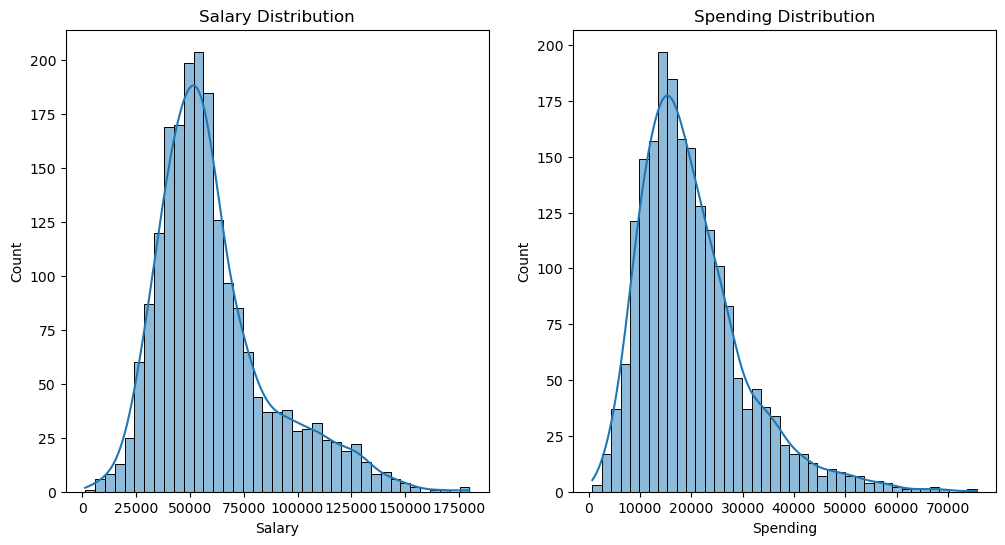

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Salary'], kde=True)
plt.title('Salary Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['Spending'], kde=True)
plt.title('Spending Distribution')

plt.show()


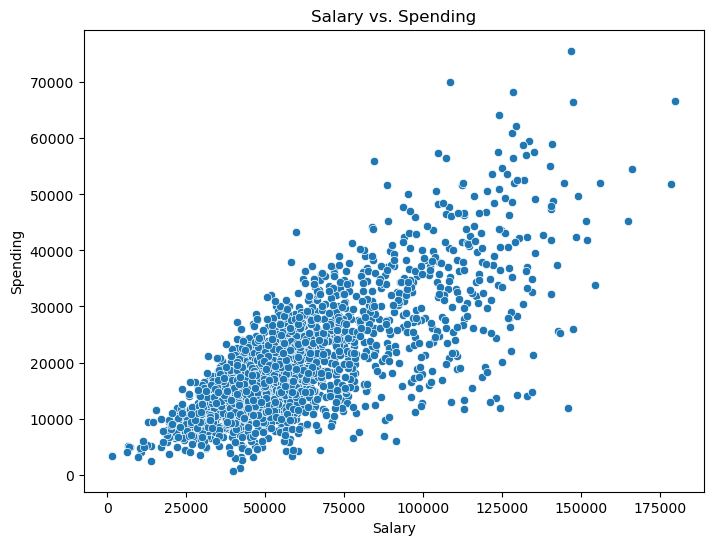

In [6]:
### Scatter Plot of Salary vs. Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary', y='Spending', data=data)
plt.title('Salary vs. Spending')
plt.show()


In [7]:
##Data Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


## 5. Determining the Optimal Number of Clusters
- 1. Elbow Method
The Elbow Method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and finding the "elbow" point.

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklea

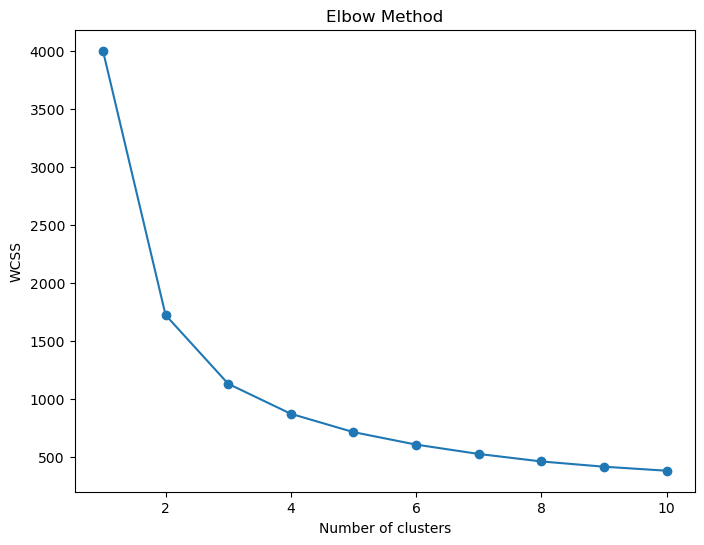

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## 5.2. Silhouette Score
The Silhouette Score helps in evaluating the quality of clusters.
### Silhouette Coefficient

- One of the metrics to evaluate the quality of clustering is referred to as silhouette analysis. Silhouette analysis can be applied to other clustering algorithms as well. Silhouette coefficient ranges between −1 and 1, where a higher silhouette coefficient refers to a model with more coherent clusters.



- Significance of Silhouette Score in k-Means Clustering
The Silhouette Score is a metric used to evaluate the quality of clustering in unsupervised learning, such as k-Means. It measures how well data points are assigned to their clusters by comparing:

- Cohesion – How close a point is to others in its own cluster.
- Separation – How far a point is from points in the nearest neighboring cluster.
The Silhouette Score (S) for each point is calculated as:


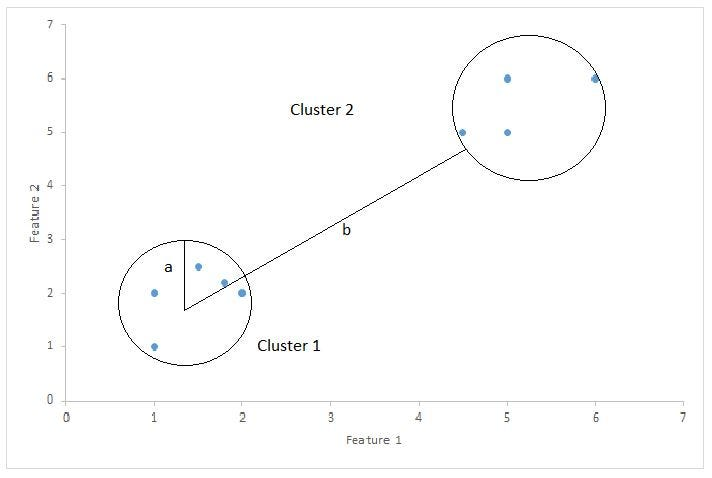

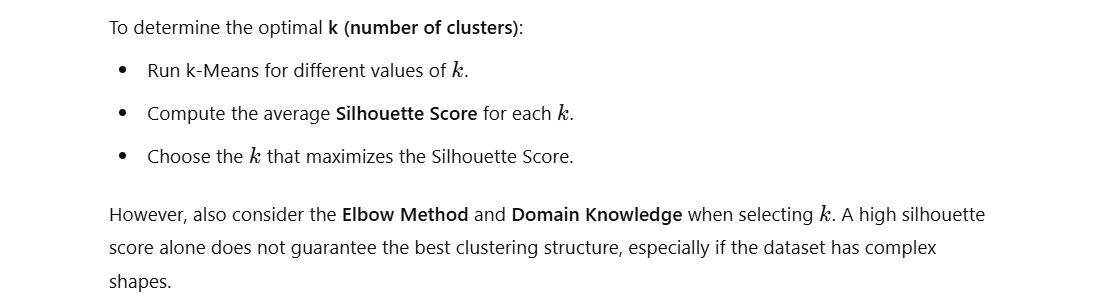

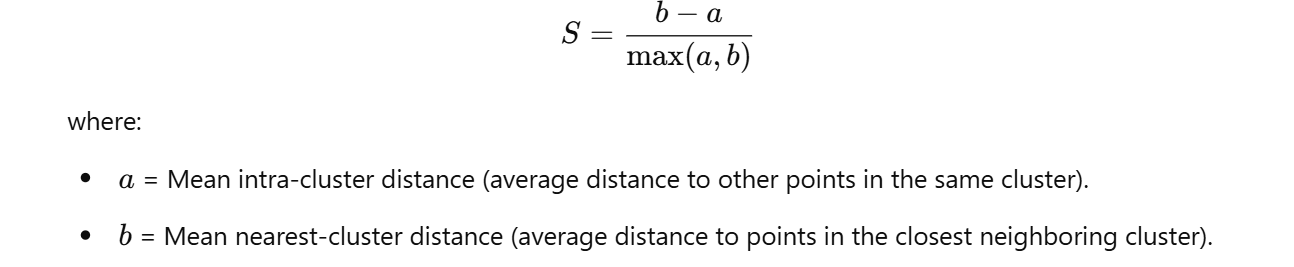

### Best Range for Silhouette Score
- The range of the Silhouette Score is between -1 and 1:
- +1 → Perfect clustering (point is far from other clusters and well within its own cluster).
- 0 → Overlapping clusters (point is on the decision boundary).
- -1 → Poor clustering (point is closer to another cluster than its own).
### What is a Good Silhouette Score?
- 0.5 to 1.0 → Strong clustering, well-separated clusters.
- 0.2 to 0.5 → Reasonable clustering, but some overlap exists.
- Below 0.2 → Weak clustering, clusters may not be meaningful.
- Negative values → Misclassification, points may be in the wrong clusters.


C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklea

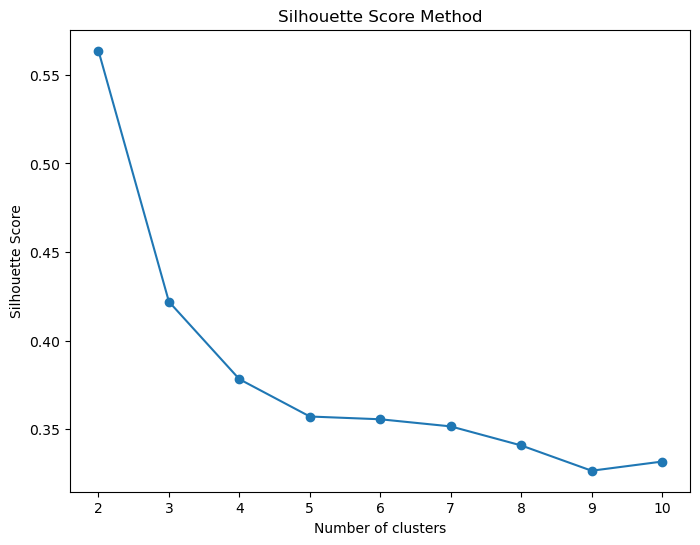

In [9]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


## 6. Applying K-Means Clustering
Applying K-Means Clustering for Different Values of K (3 to 5), Assign group names to the final clusters

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


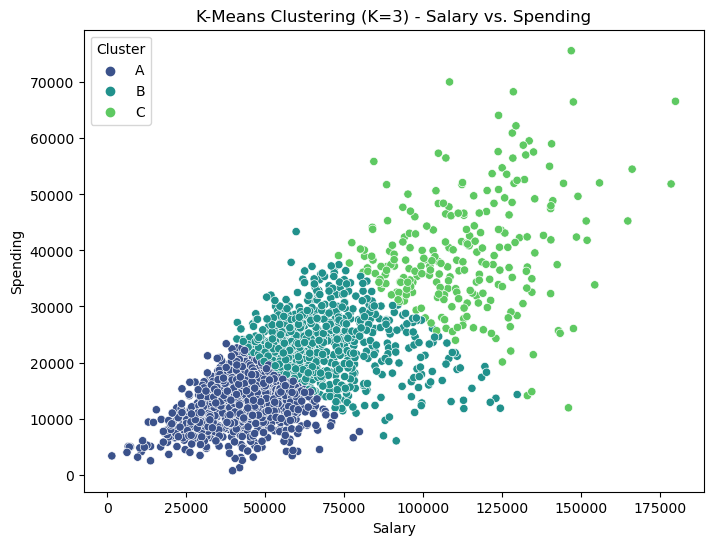

Cluster Centers for K=3:
           Salary      Spending
0   42618.419044  13005.830934
1   67892.949258  23165.301573
2  112937.535052  39353.133326

Cluster Names and Counts:
 Cluster_Name_3
A    999
B    755
C    246
Name: count, dtype: int64


C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


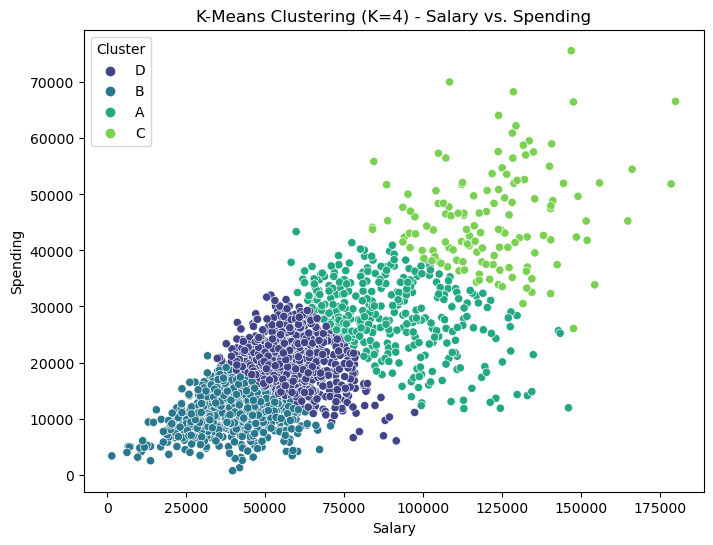

Cluster Centers for K=4:
           Salary      Spending
0   89972.438334  28436.530584
1   39457.686287  11663.848873
2  121507.520963  45562.018502
3   58299.714661  20189.044601

Cluster Names and Counts:
 Cluster_Name_4
D    786
B    743
A    338
C    133
Name: count, dtype: int64


C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


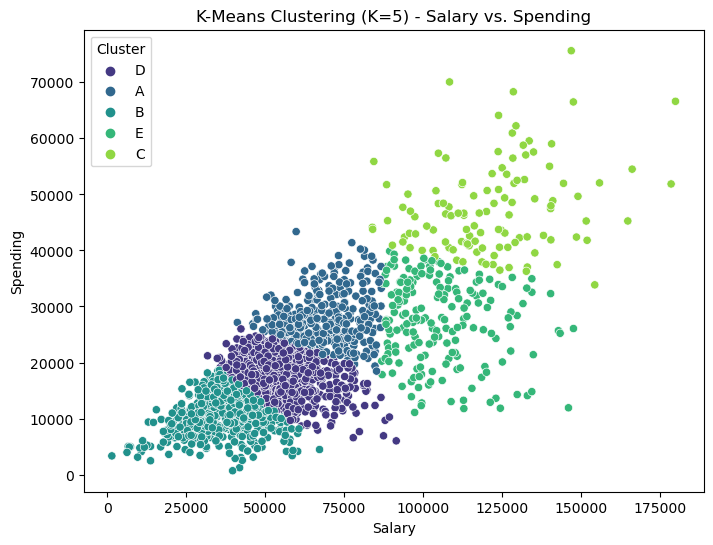

Cluster Centers for K=5:
           Salary      Spending
0   68342.448552  27616.266665
1   36879.367509  10968.270339
2  121353.660180  47423.991662
3   55480.185477  17639.828113
4  105460.894597  27397.426600

Cluster Names and Counts:
 Cluster_Name_5
D    734
B    596
A    362
E    194
C    114
Name: count, dtype: int64


In [11]:
k_values = [3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Assigning cluster labels
    data[f'Cluster_{k}'] = clusters

    # Analyzing cluster centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    cluster_centers = pd.DataFrame(centers, columns=['Salary', 'Spending'])

    # Naming clusters (this is a simple naming approach; you may adjust based on actual data)
    if k == 3:
        cluster_names = ['A', 'B', 'C']
    elif k == 4:
        cluster_names = ['A', 'B', 'C', 'D']
    elif k == 5:
        cluster_names = ['A', 'B', 'C', 'D', 'E']

    # Mapping the cluster names
    data[f'Cluster_Name_{k}'] = data[f'Cluster_{k}'].map(dict(zip(range(k), cluster_names)))

    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Salary', y='Spending', hue=f'Cluster_Name_{k}', data=data, palette='viridis')
    plt.title(f'K-Means Clustering (K={k}) - Salary vs. Spending')
    plt.legend(title='Cluster')
    plt.show()

    print(f"Cluster Centers for K={k}:\n", cluster_centers)
    print("\nCluster Names and Counts:\n", data[f'Cluster_Name_{k}'].value_counts())




### Based on the Elbow and Silhouette methods 4 clusters provide the best fit

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Assigning cluster labels
data['Cluster_4'] = clusters

# Analyzing cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(centers, columns=['Salary', 'Spending'])

# Naming clusters
cluster_names = ['High Salary & Moderate S', 'Low Salary & Low Spending', 'Medium Salary & Spending','High Salary & Medium Spending']

# Mapping the cluster names
data['Cluster_Name_4'] = data['Cluster_4'].map(dict(zip(range(4), cluster_names)))


C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


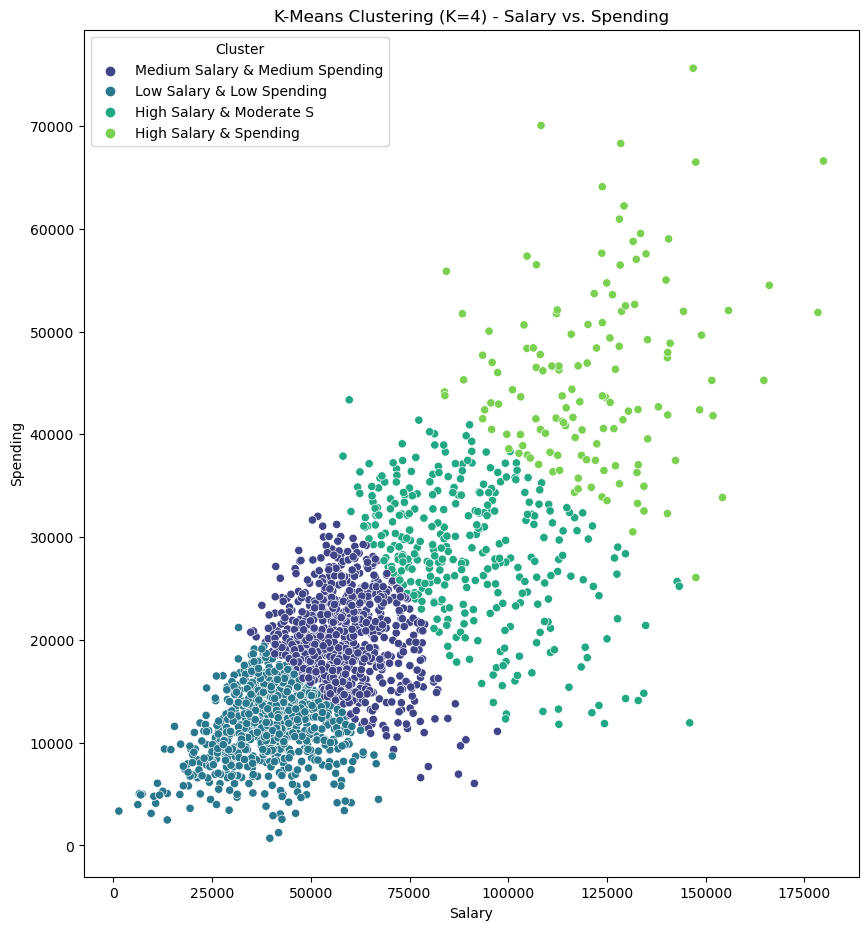

In [13]:
plt.figure(figsize=(10, 11))
sns.scatterplot(x='Salary', y='Spending', hue='Cluster_Name_4', data=data, palette='viridis')
plt.title('K-Means Clustering (K=4) - Salary vs. Spending')
plt.legend(title='Cluster')
plt.show()



In [ ]:
 cluster_centers

In [15]:
data['Cluster_Name_3'].value_counts()

Cluster_Name_3
A    999
B    755
C    246
Name: count, dtype: int64

### Conclusion
### Low Salary & Low Spending:
- Individuals in this cluster have relatively low salaries and spend less.
- This group might represent entry-level employees or individuals in lower-income brackets.
#### Insight: Focus on budget-friendly products or services and potential financial advice for this group.

### High Salary & High Spending:
- Individuals in this cluster have high salaries and spend more.
- This group could represent high-income professionals or individuals with significant disposable income.
#### Insight: Target premium products, luxury services, or investment opportunities for this group.

### High Salary & Low Spending:
#### Insight: Target for Ssaving Schemes

### Moderate Salary & Spending:
- Individuals in this cluster have moderate salaries and spending patterns.
- This group may include mid-level professionals or individuals with moderate financial flexibility.
#### Insight: Offer value-for-money products, services, and moderate investment options.